<a href="https://colab.research.google.com/github/qiao-hao-git/ML_Code/blob/main/Deep_Neural_Network_Application_Image_Classification/Deep_Neural_Network_Application_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Deep Neural Networks Application_Image Classification')

Mounted at /content/drive


In [8]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
!pip install PIL
from PIL import Image
from dnn_app_utils_v2 import *
import datetime
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0,4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


y = 0. It's a non-cat picture.


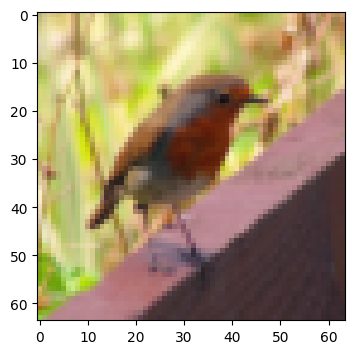

In [9]:
train_x_orig,train_y,test_x_orig,test_y,classes = load_data()

index = 10
plt.imshow(train_x_orig[index])
print("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [10]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print("Number of training examples: " + str(m_train))
print("Number of testing examples: " + str(m_test))
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print("train_x_orig shape: " + str(train_x_orig.shape))
print("train_y shape: " + str(train_y.shape))
print("test_x_orig shape: " + str(test_x_orig.shape))
print("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [11]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0],-1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0],-1).T

train_x = train_x_flatten/255
test_x = test_x_flatten/255

print("train_x's shape: " + str(train_x.shape))
print("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


加载数据集并且归一化

In [12]:
def initialize_parameters(n_x,n_h,n_y):
  np.random.seed(1)
  W1 = np.random.randn(n_h,n_x)*0.01
  b1 = np.zeros((n_h,1))
  W2 = np.random.randn(n_y,n_h)*0.01
  b2 = np.zeros((n_y,1))

  assert(W1.shape==(n_h,n_x))
  assert(b1.shape==(n_h,1))
  assert(W2.shape==(n_y,n_h))
  assert(b2.shape==(n_y,1))

  parameters = {"W1":W1,"b1":b1,
          "W2":W2,"b2":b2}

  return parameters

def linear_activation_forward(A_prev,W,b,activation):
  if activation=='sigmoid':
    Z,linear_cache = linear_forward(A_prev,W,b)
    A,activation_cache = sigmoid(Z)
  elif activation=='relu':
    Z,linear_cache = linear_forward(A_prev,W,b)
    A,activation_cache = relu(Z)

  assert(A.shape==(W.shape[0],A_prev.shape[1]))
  cache = (linear_cache,activation_cache)

  return A,cache

def compute_cost(AL,Y):
  m = Y.shape[1]
  cost = (-np.dot(np.log(AL),Y.T)-np.dot(np.log(1-AL),1-Y.T))/m
  cost = np.squeeze(cost)

  assert(cost.shape==())

  return cost

def linear_activation_backward(dA,cache,activation):
  linear_cache,activation_cache = cache

  if activation=='sigmoid':
    dZ = sigmoid_backward(dA,activation_cache)
    dA_prev,dW,db = linear_backward(dZ,linear_cache)
  elif activation=='relu':
    dZ = relu_backward(dA,activation_cache)
    dA_prev,dW,db = linear_backward(dZ,linear_cache)

  return dA_prev,dW,db

def update_parameters(parameters,grads,learning_rate):
  L = len(parameters)//2
  for i in range(1,L+1):
    parameters["W"+str(i)] -= learning_rate*grads["dW"+str(i)]
    parameters["b"+str(i)] -= learning_rate*grads["db"+str(i)]

  return parameters

In [13]:
n_x = 12288
n_h = 7
n_y = 1
layers_dims = (n_x,n_h,n_y)

In [14]:
def two_layer_model(X,Y,layers_dims,learning_rate=0.0075,num_iterations=3000,print_cost=False):
  np.random.seed(1)
  grads={}
  costs=[]

  m = X.shape[1]
  (n_x,n_h,n_y) = layers_dims

  parameters = initialize_parameters(n_x,n_h,n_y)

  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  for i in range(num_iterations):
    A1,cache1 = linear_activation_forward(X,parameters["W1"],parameters["b1"],'relu')
    A2,cache2 = linear_activation_forward(A1,parameters["W2"],parameters["b2"],'sigmoid')

    cost = compute_cost(A2,Y)

    dA2 = -(np.divide(Y,A2)-np.divide(1-Y,1-A2))

    dA1,dW2,db2 = linear_activation_backward(dA2,cache2,activation='sigmoid')
    dA0,dW1,db1 = linear_activation_backward(dA1,cache1,activation='relu')

    grads["dW1"] = dW1
    grads["db1"] = db1
    grads["dW2"] = dW2
    grads["db2"] = db2

    parameters = update_parameters(parameters,grads,learning_rate)

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    if print_cost and i%100==0:
      print("Cost after iteration {}: {}".format(i,np.squeeze(cost)))
    if i%100==0:
      costs.append(cost)
  if not(print_cost):
    print("The final cost = %f" %(cost))

  plt.plot(np.squeeze(costs))
  plt.ylabel('cost')
  plt.xlabel('iterations (per hundreds)')
  plt.title("Learning rate =" + str(learning_rate))
  plt.show()

  return parameters

Cost after iteration 0: 0.6930497356599891
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912678
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605748
Cost after iteration 500: 0.515830477276473
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.43391631512257506
Cost after iteration 800: 0.4007977536203886
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366414
Cost after iteration 1100: 0.3052753636196265
Cost after iteration 1200: 0.2749137728213016
Cost after iteration 1300: 0.24681768210614854
Cost after iteration 1400: 0.19850735037466116
Cost after iteration 1500: 0.1744831811255665
Cost after iteration 1600: 0.17080762978096659
Cost after iteration 1700: 0.11306524562164712
Cost after iteration 1800: 0.0962942684593715
Cost after iteration 1900: 0.08342617959726863
Cost after iteration 2000: 0.07439078704319083
Cost after iteration 2100: 0.06630748132

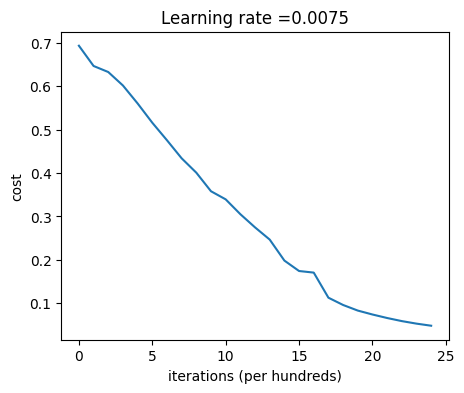

In [15]:
parameters = two_layer_model(train_x,train_y,layers_dims=(n_x,n_h,n_y),num_iterations=2500,print_cost=True)

2023-07-24 12:42:04.205763
The final cost = 0.638358


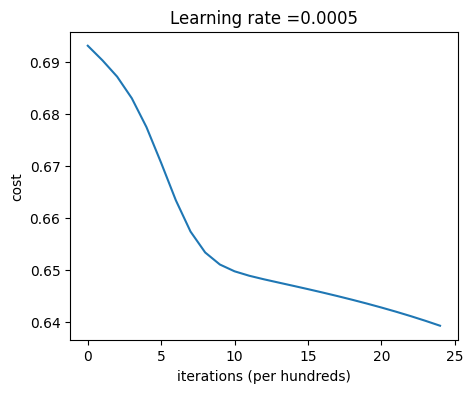

2023-07-24 12:43:33.340339
The final cost = 0.587800


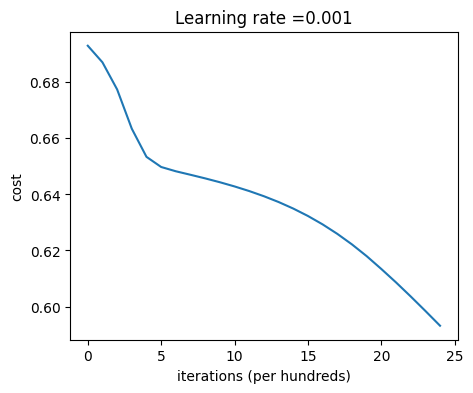

2023-07-24 12:44:43.768279
The final cost = 0.206029


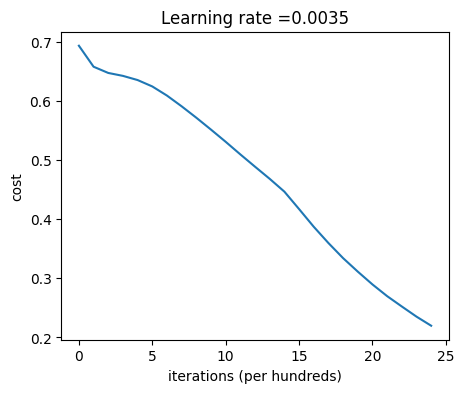

2023-07-24 12:45:53.823537
The final cost = 0.044215


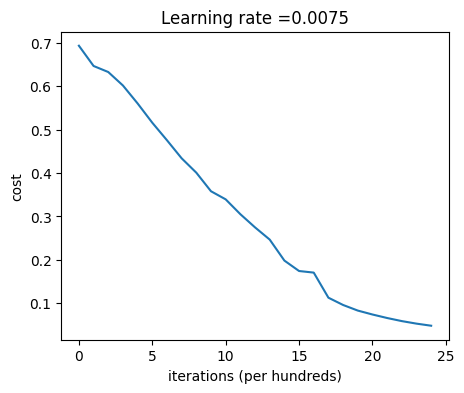

2023-07-24 12:47:02.121213
The final cost = 0.010368


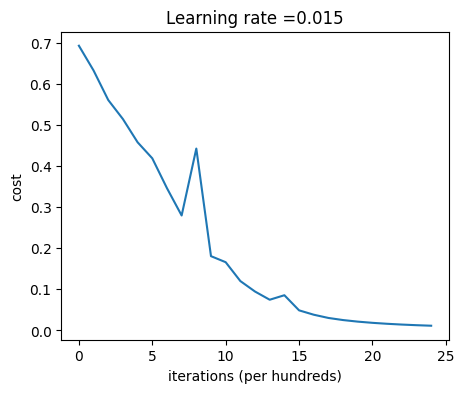

2023-07-24 12:48:07.724228
The final cost = 0.099678


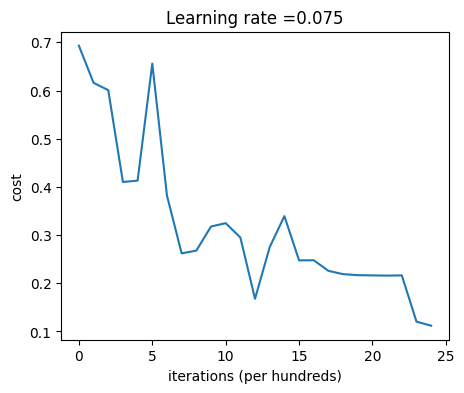

2023-07-24 12:49:22.142534
The final cost = 0.643974


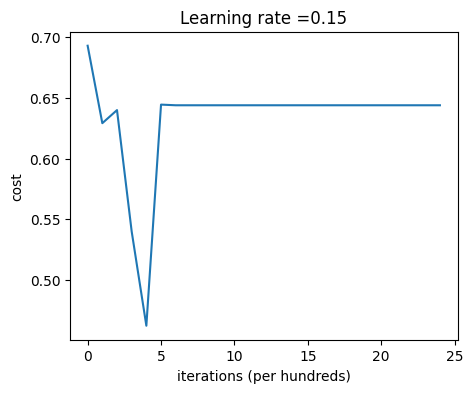

2023-07-24 12:50:29.691014


In [16]:
print(datetime.datetime.now())
two_layer_model(train_x, train_y, layers_dims=(n_x, n_h, n_y), learning_rate=0.0005, num_iterations=2500, print_cost=False)
print(datetime.datetime.now())
two_layer_model(train_x, train_y, layers_dims=(n_x, n_h, n_y), learning_rate=0.0010, num_iterations=2500, print_cost=False)
print(datetime.datetime.now())
two_layer_model(train_x, train_y, layers_dims=(n_x, n_h, n_y), learning_rate=0.0035, num_iterations=2500, print_cost=False)
print(datetime.datetime.now())
two_layer_model(train_x, train_y, layers_dims=(n_x, n_h, n_y), learning_rate=0.0075, num_iterations=2500, print_cost=False)
print(datetime.datetime.now())
two_layer_model(train_x, train_y, layers_dims=(n_x, n_h, n_y), learning_rate=0.0150, num_iterations=2500, print_cost=False)
print(datetime.datetime.now())
two_layer_model(train_x, train_y, layers_dims=(n_x, n_h, n_y), learning_rate=0.0750, num_iterations=2500, print_cost=False)
print(datetime.datetime.now())
two_layer_model(train_x, train_y, layers_dims=(n_x, n_h, n_y), learning_rate=0.1500, num_iterations=2500, print_cost=False)
print(datetime.datetime.now())

In [17]:
def predict(X,y,parameters):
  m = X.shape[1]
  n = len(parameters)//2
  p = np.zeros((1,m))

  probas,caches = L_model_forward(X,parameters)
  for i in range(probas.shape[1]):
    if probas[0,i]>0.5:
      p[0,i] = 1
    else:
      p[0,i] = 0

  print("Accurcy = " + str(np.sum(p==y)/(1.0*m)))

  return p

In [18]:
predictions_train = predict(train_x,train_y,parameters)
predictions_test = predict(test_x,test_y,parameters)

Accurcy = 1.0
Accurcy = 0.72


二层神经网络模型

In [36]:
def initialize_parameters_deep(layer_dims):
  np.random.seed(1)
  parameters = {}

  L = len(layer_dims)

  for i in range(1,L):
    parameters["W"+str(i)] = np.random.randn(layer_dims[i],layers_dims[i-1])/np.sqrt(layer_dims[i-1])
    parameters["b"+str(i)] = np.zeros((layer_dims[i],1))

    assert(parameters["W"+str(i)].shape==(layer_dims[i],layers_dims[i-1]))
    assert(parameters["b"+str(i)].shape==(layer_dims[i],1))

  return parameters

def L_model_forward(X,parameters):
  caches = []
  A = X
  L = len(parameters)//2

  for i in range(1,L):
    A_prev = A
    A,cache = linear_activation_forward(A_prev,parameters["W"+str(i)],parameters["b"+str(i)],'relu')
    caches.append(cache)

  AL,cache = linear_activation_forward(A,parameters["W"+str(L)],parameters["b"+str(L)],'sigmoid')
  caches.append(cache)

  assert(AL.shape==(1,X.shape[1]))

  return AL,caches

def compute_cost(AL,Y):
  m = Y.shape[1]

  cost = -(np.dot(np.log(AL),Y.T)+np.dot(np.log(1-AL),1-Y.T))/m

  cost = np.squeeze(cost)
  assert(cost.shape==())

  return cost

def L_model_backward(AL,Y,caches):
  grads = {}
  L = len(caches)
  m = AL.shape[1]
  Y = Y.reshape(AL.shape)

  dAL = -(np.divide(Y,AL)-np.divide(1-Y,1-AL))
  grads["dA"+str(L)],grads["dW"+str(L)],grads["db"+str(L)] = linear_activation_backward(dAL,caches[L-1],'sigmoid')

  for i in reversed(range(L-1)):
    current_cache = caches[i]
    dA,dW,db = linear_activation_backward(grads["dA"+str(i+2)],current_cache,'relu')

    grads["dA"+str(i+1)] = dA
    grads["dW"+str(i+1)] = dW
    grads["db"+str(i+1)] = db

  return grads

def update_parameters(parameters,grads,learning_rate):
  L = len(parameters)//2
  for i in range(1,L+1):
    parameters["W"+str(i)] -= learning_rate*grads["dW"+str(i)]
    parameters["b"+str(i)] -= learning_rate*grads["db"+str(i)]

  return parameters

In [29]:
layers_dims = [12288,20,7,5,1]

In [38]:
def L_layer_model(X,Y,layers_dims,learning_rate=0.0075,num_iterations=3000,print_cost=False):
  np.random.seed(1)
  costs = []

  parameters = initialize_parameters_deep(layers_dims)
  for i in range(num_iterations):
    AL,caches = L_model_forward(X,parameters)
    cost = compute_cost(AL,Y)
    grads = L_model_backward(AL,Y,caches)
    parameters = update_parameters(parameters,grads,learning_rate)

    if print_cost and i%100==0:
      print("Cost after iteration %i: %f"%(i,cost))
      costs.append(cost)

  plt.plot(np.squeeze(costs))
  plt.ylabel('cost')
  plt.xlabel('iterations (per tens)')
  plt.title("Learning rate =" + str(learning_rate))
  plt.show()
  return parameters

Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


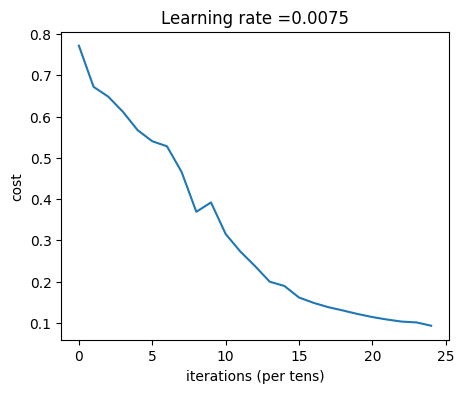

In [40]:
parameters = L_layer_model(train_x,train_y,layers_dims,num_iterations=2500,print_cost=True)

In [41]:
pred_train = predict(train_x,train_y,parameters)
pred_test = predict(test_x,test_y,parameters)

Accurcy = 0.9856459330143541
Accurcy = 0.8


L层神经网络模型

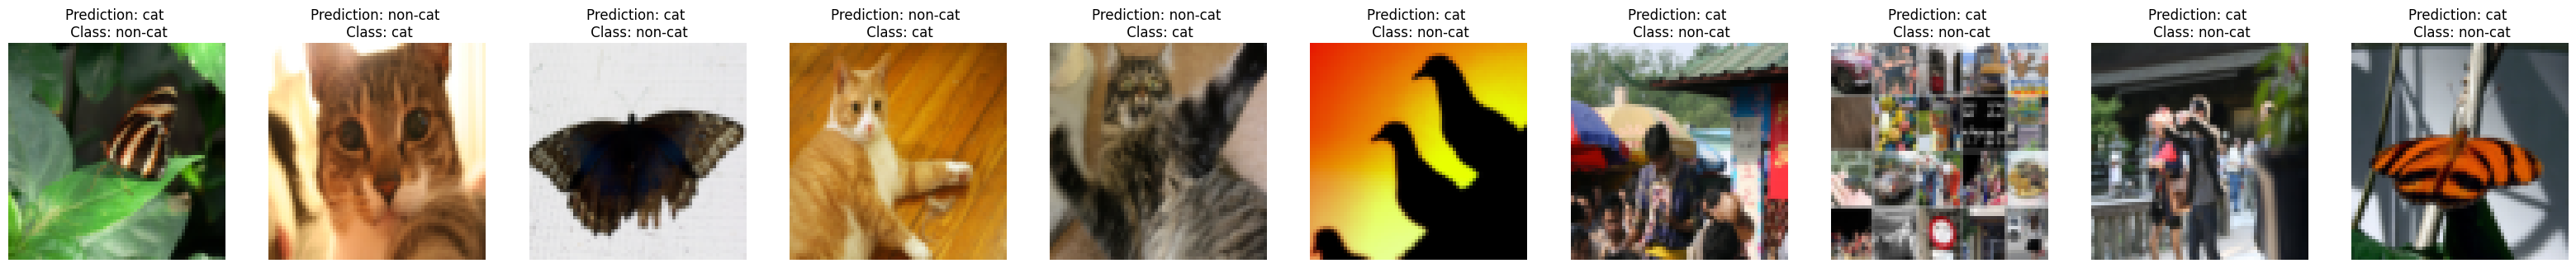

In [42]:
print_mislabeled_images(classes,test_x,test_y,pred_test)

<ipython-input-44-ce63d5dbb0c0>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(fname)


(3, 64, 64)
Accurcy = 1.0
y = 1.0, your algorithm predicts a "cat" picture.


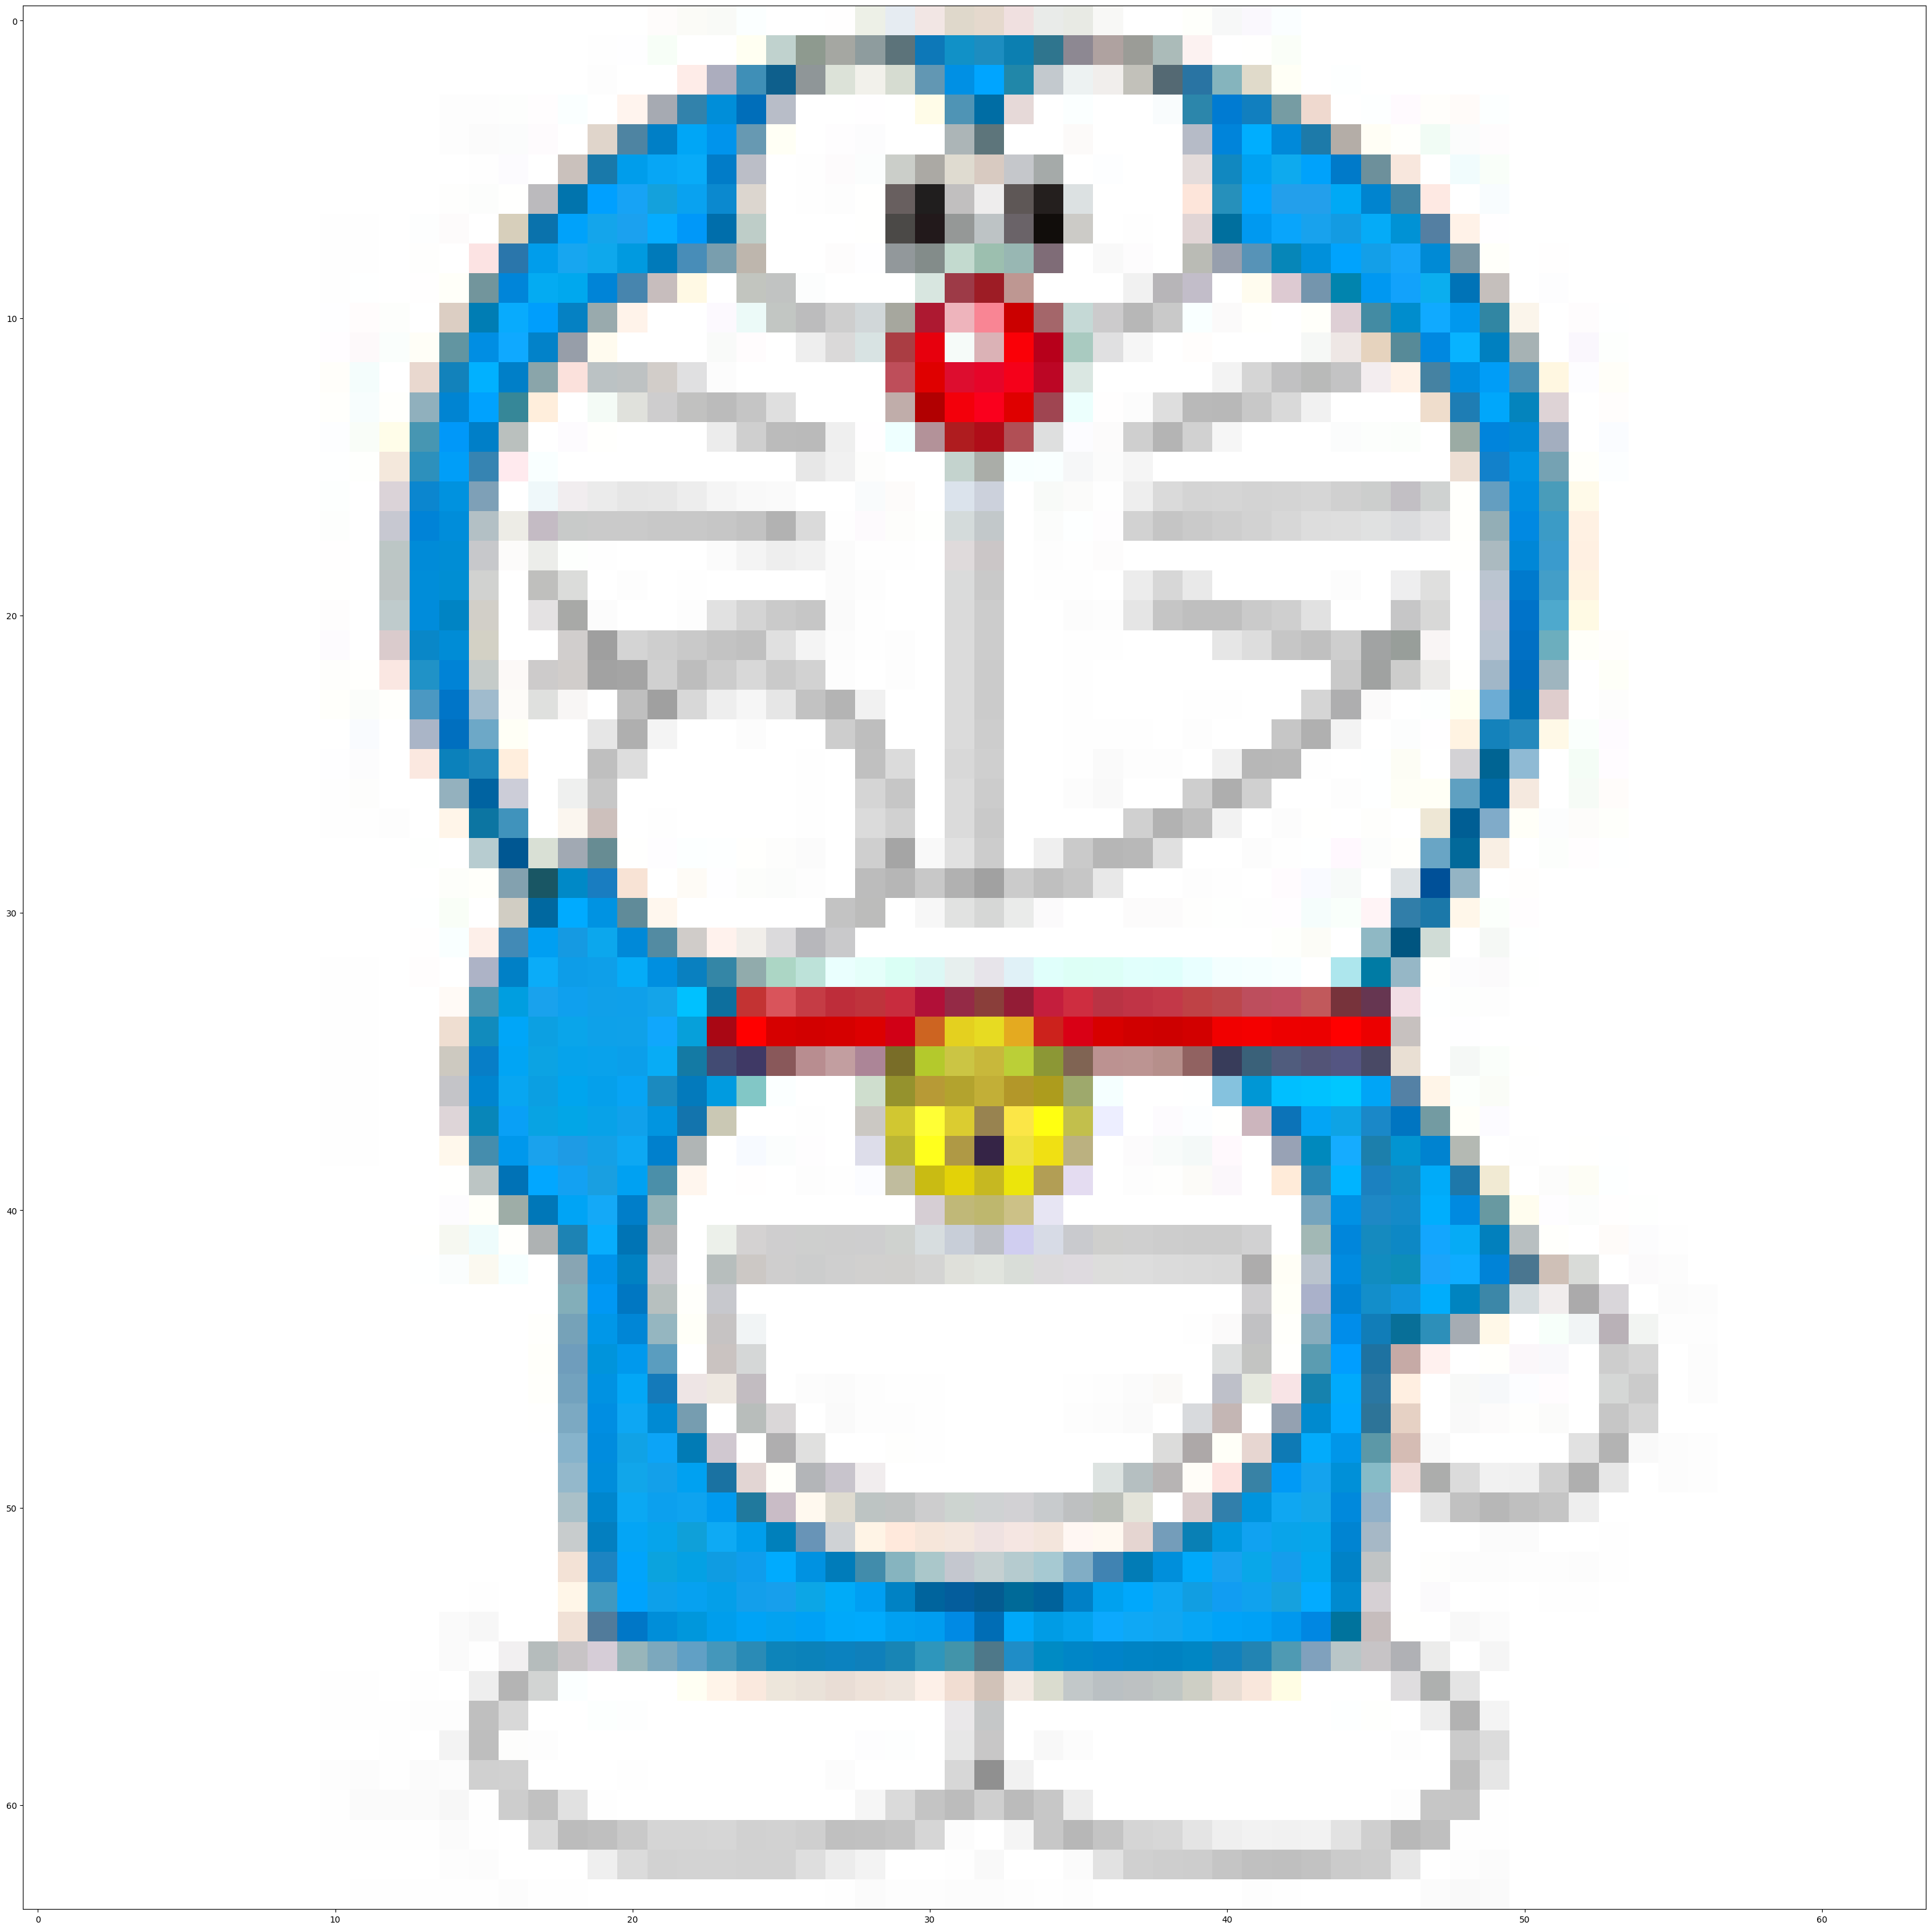

In [44]:
import imageio
my_image = "my_image.jpg"
fname = "/content/sample_data/" + my_image
image = imageio.imread(fname)
my_label_y = [1]
print(image.shape)

reshaped_image = np.transpose(image,(1,2,0))
my_image = image.reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(my_image,my_label_y,parameters)

plt.imshow(reshaped_image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" +
      classes[int(np.squeeze(my_predicted_image))].decode("utf-8") +  "\" picture.")